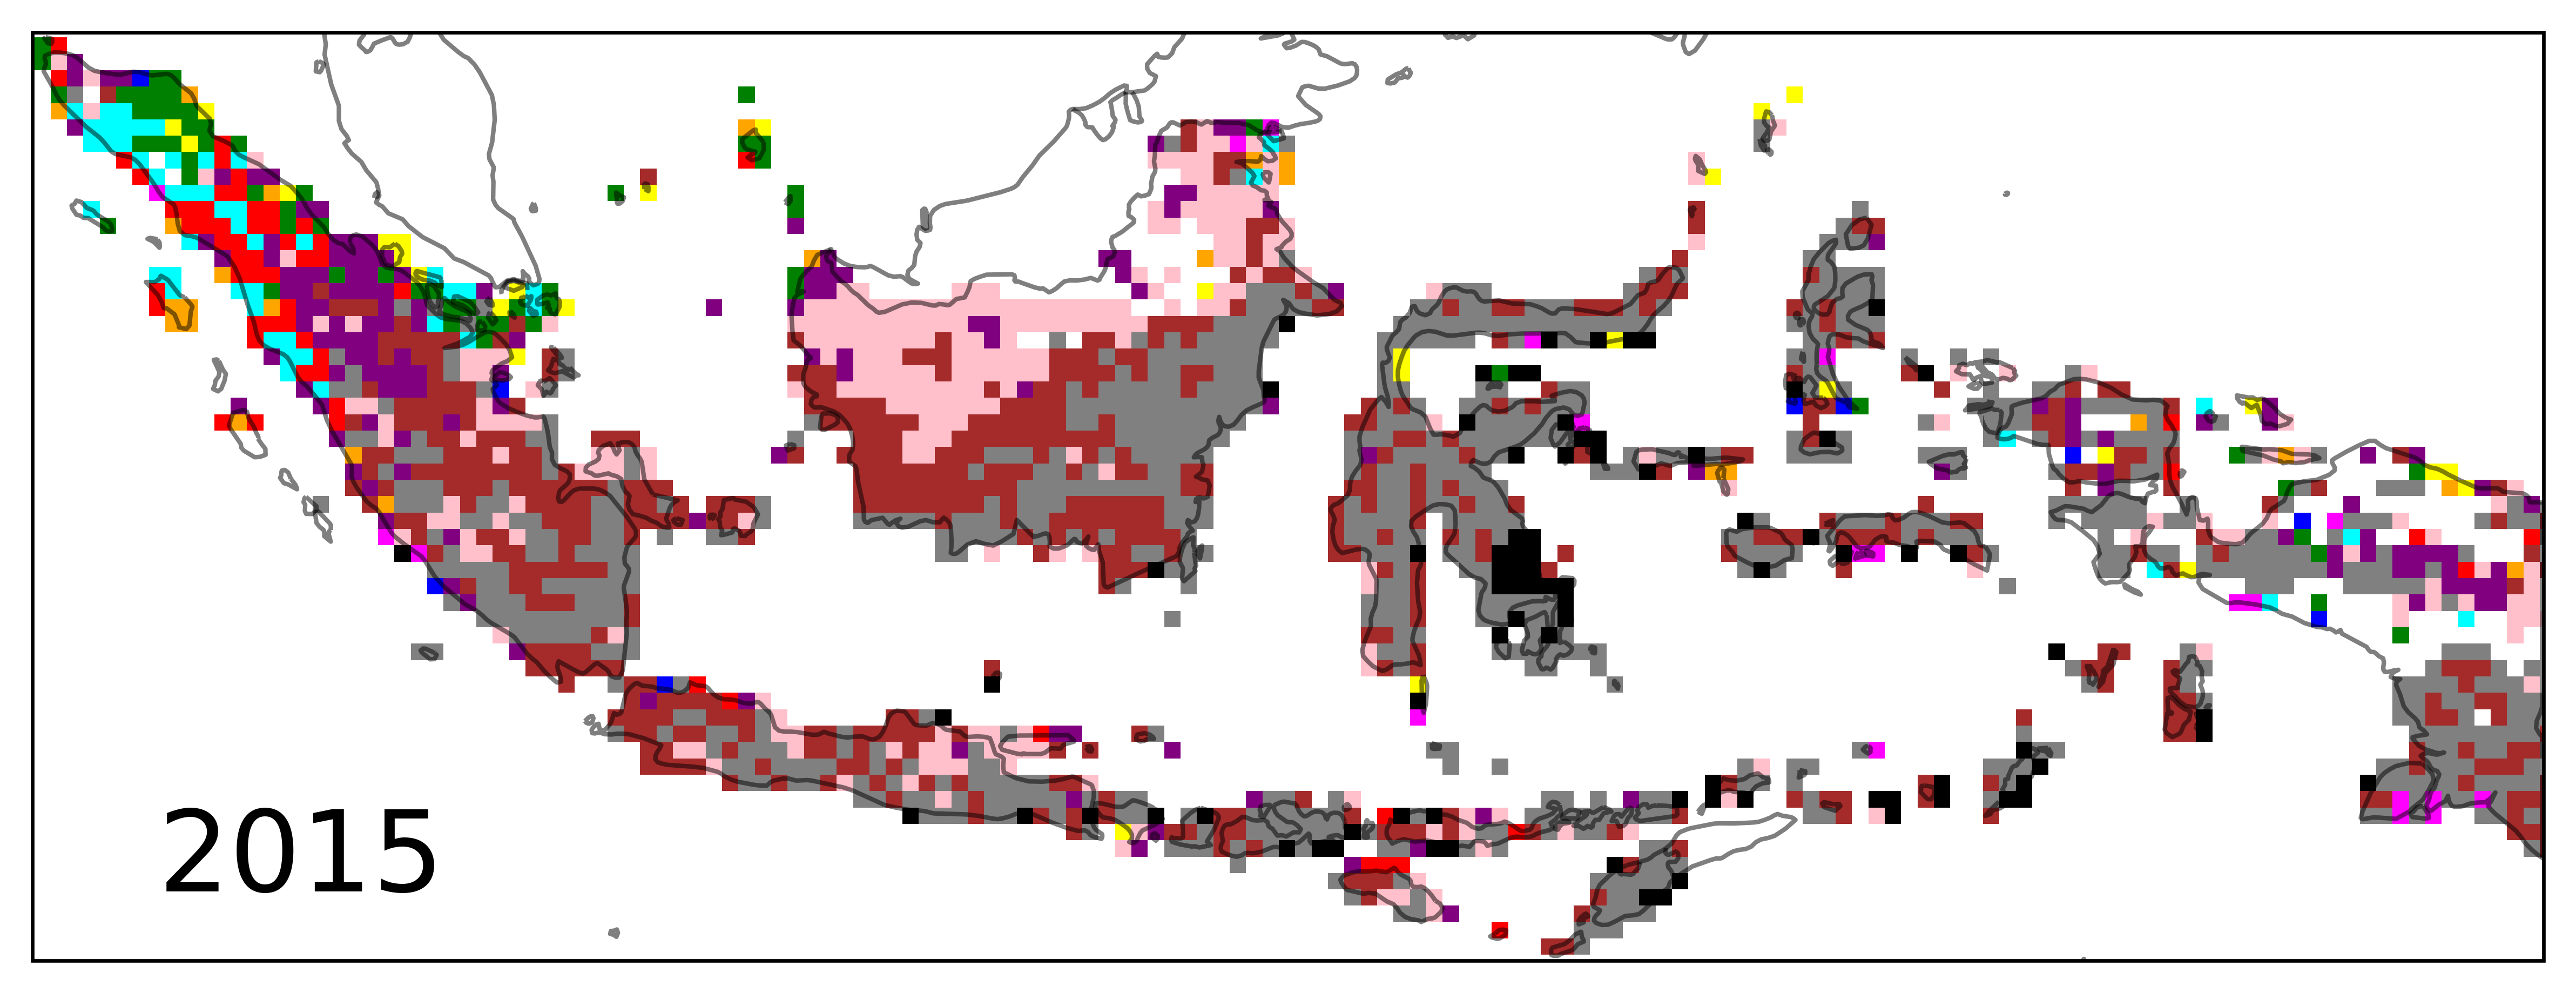

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap
import numpy as np
import cartopy.feature as cfeature
from shapely.geometry import Polygon
import geopandas as gpd

# 读取CSV文件
surveys_df_archive = pd.read_csv('fire_archive_SV-C2_437317.csv')
surveys_df_nrt = pd.read_csv('fire_nrt_SV-C2_437317.csv')

# 合并数据
surveys_df = pd.concat([surveys_df_archive, surveys_df_nrt], ignore_index=True)

# 筛选数据，只保留2012年的火灾数据
filtered_data = surveys_df[(surveys_df['acq_date'] >= '2015-01-01') &
                           (surveys_df['acq_date'] <= '2015-12-31')].copy()

# 将'acq_date'列转换为日期格式
filtered_data['acq_date'] = pd.to_datetime(filtered_data['acq_date'])

# 提取月份
filtered_data['month'] = filtered_data['acq_date'].dt.month

# 定义网格大小（单位：度）
grid_size = 0.3

# 创建经度和纬度的网格
lon_bins = np.arange(filtered_data['longitude'].min(), filtered_data['longitude'].max() + grid_size, grid_size)
lat_bins = np.arange(filtered_data['latitude'].min(), filtered_data['latitude'].max() + grid_size, grid_size)

# 将经纬度数据分配到网格中
filtered_data['lon_bin'] = np.digitize(filtered_data['longitude'], lon_bins) - 1
filtered_data['lat_bin'] = np.digitize(filtered_data['latitude'], lat_bins) - 1

# 统计每个网格中每个月的火灾数量
fire_counts = filtered_data.groupby(['lon_bin', 'lat_bin', 'month']).size().reset_index(name='count')

# 找出每个网格中火灾数量最多的月份
max_fire_months = fire_counts.loc[fire_counts.groupby(['lon_bin', 'lat_bin'])['count'].idxmax()]

# 为每个网格创建多边形并确定颜色
polygons = []
months = []
month_colors = {1: 'blue', 2: 'cyan', 3: 'green', 4: 'yellow', 5: 'orange', 6: 'red', 7: 'purple', 8: 'pink', 9: 'brown', 10: 'gray', 11: 'black', 12: 'magenta'}

for i in range(len(lon_bins) - 1):
    for j in range(len(lat_bins) - 1):
        lon_min, lon_max = lon_bins[i], lon_bins[i + 1]
        lat_min, lat_max = lat_bins[j], lat_bins[j + 1]
        polygons.append(Polygon([(lon_min, lat_min), (lon_max, lat_min), (lon_max, lat_max), (lon_min, lat_max)]))
        max_fire_month = max_fire_months[(max_fire_months['lon_bin'] == i) & (max_fire_months['lat_bin'] == j)]
        if not max_fire_month.empty:
            months.append(max_fire_month['month'].values[0])
        else:
            months.append(np.nan)  # 使用NaN标记没有火灾数据的网格

# 创建GeoDataFrame
grid_gdf = gpd.GeoDataFrame({'geometry': polygons, 'month': months})

# 创建图形和轴
fig = plt.figure(figsize=(10, 8), dpi=600)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 设置地图范围和添加地图特征
ax.set_extent([95, 141, -11, 6], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black', alpha=0.5)
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', alpha=0.5)

# 绘制网格，每个网格的颜色表示火灾数量最多的月份
cmap = ListedColormap([month_colors[m] for m in range(1, 13)])
grid_gdf.plot(column='month', cmap=cmap, linewidth=0, ax=ax, edgecolor='1', legend=False, missing_kwds={"color": "white"})

# 在子图左下角添加标题
ax.text(
    0.05,  # x 坐标（相对位置，0 为最左，1 为最右）
    0.05,  # y 坐标（相对位置，0 为最底，1 为最顶）
    f'2015',  # 文本内容
    transform=ax.transAxes,  # 坐标系统（相对坐标系统）
    fontsize= 25,  # 字体大小
    ha='left',  # 水平对齐方式
    va='bottom',  # 垂直对齐方式
    color='black',  # 文字颜色
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # 背景框样式
)

# 保存和显示图形
plt.savefig('F2-2015.png', dpi=600, bbox_inches='tight')
plt.show()


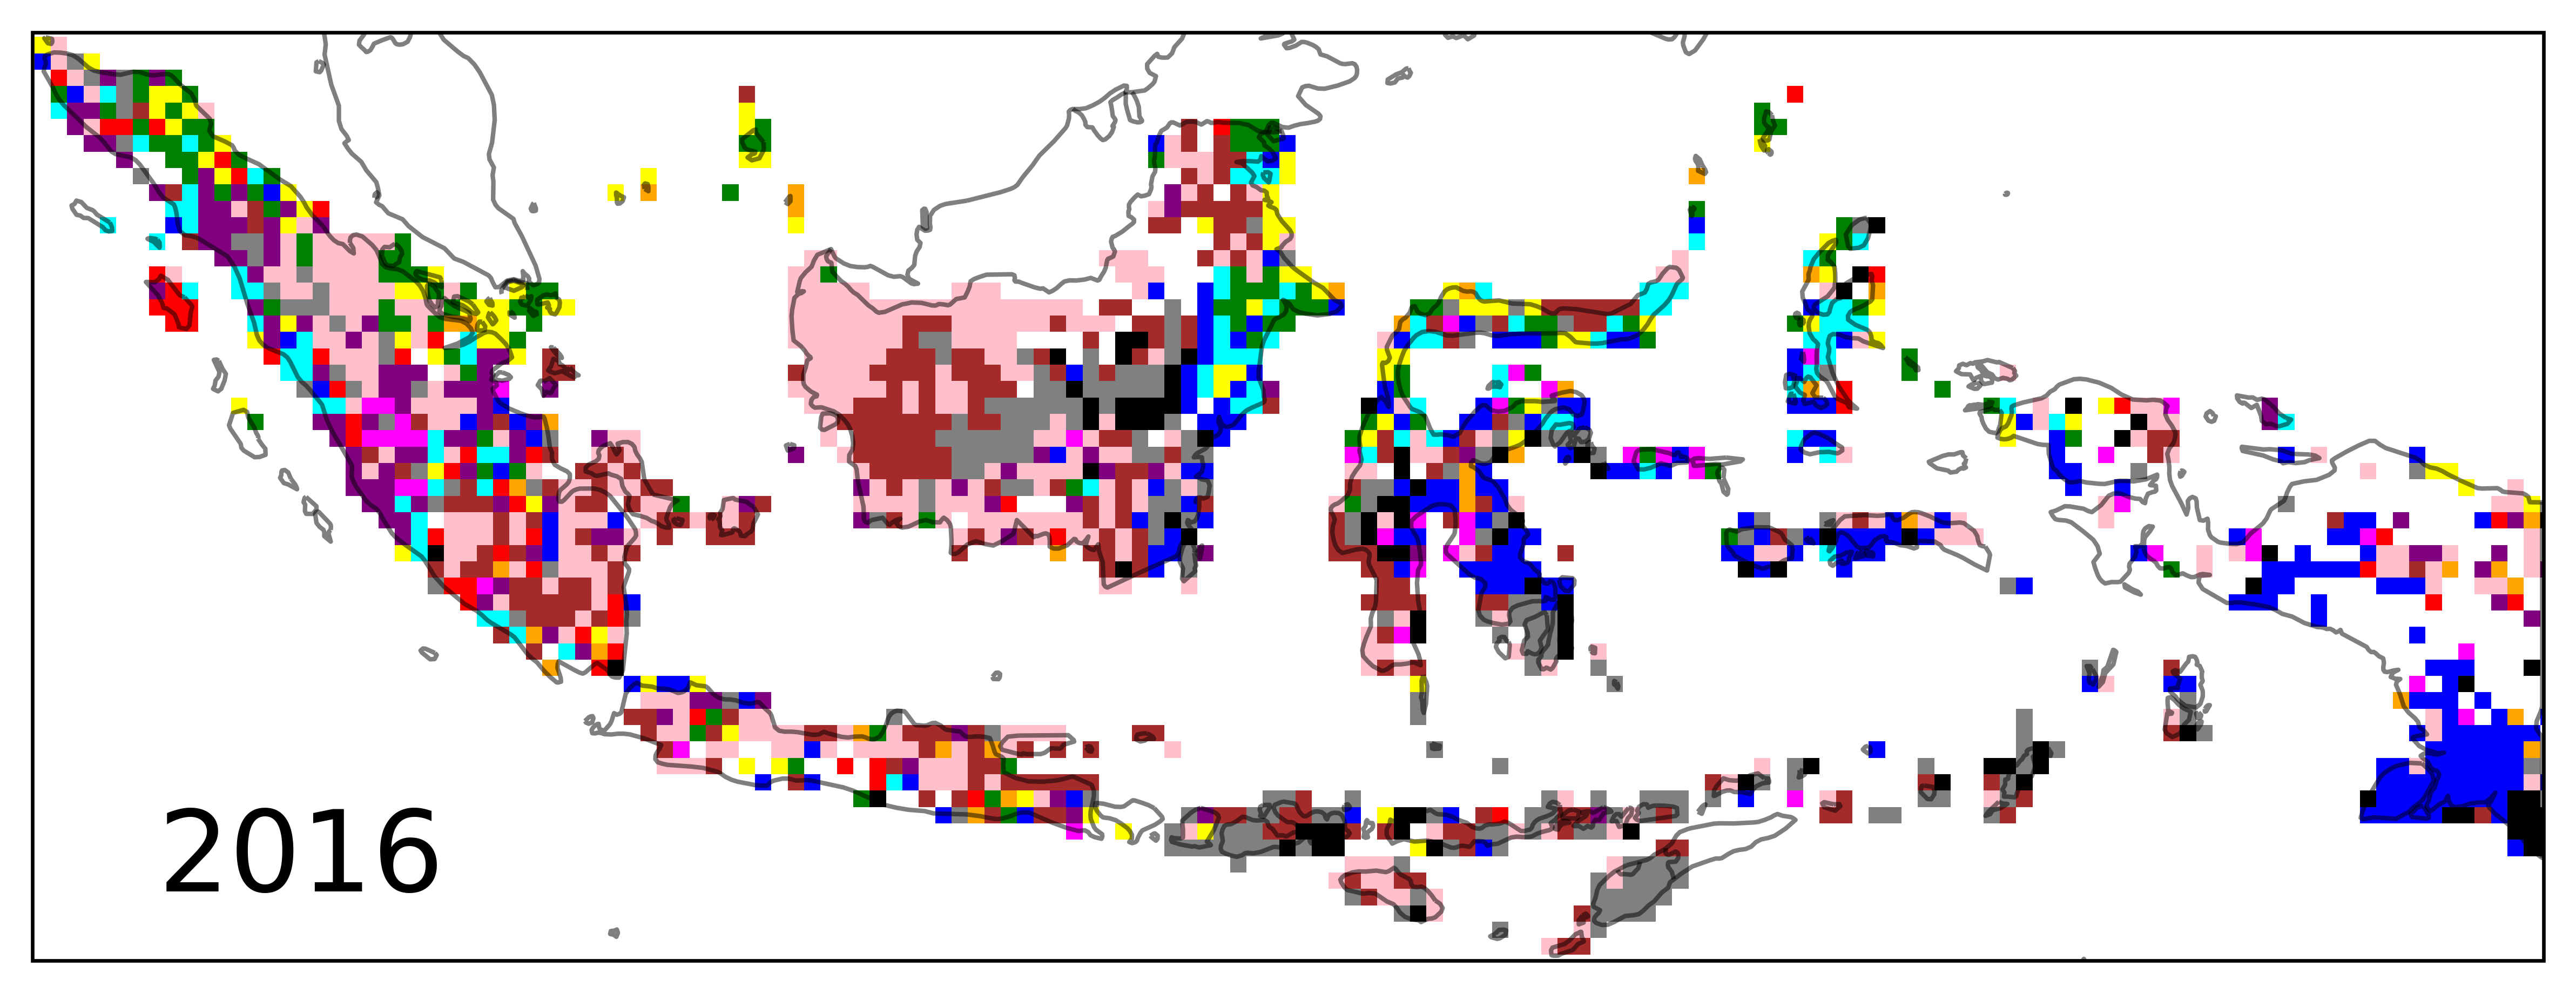

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap
import numpy as np
import cartopy.feature as cfeature
from shapely.geometry import Polygon
import geopandas as gpd

# 读取CSV文件
surveys_df_archive = pd.read_csv('fire_archive_SV-C2_437317.csv')
surveys_df_nrt = pd.read_csv('fire_nrt_SV-C2_437317.csv')

# 合并数据
surveys_df = pd.concat([surveys_df_archive, surveys_df_nrt], ignore_index=True)

# 筛选数据，只保留2012年的火灾数据
filtered_data = surveys_df[(surveys_df['acq_date'] >= '2016-01-01') &
                           (surveys_df['acq_date'] <= '2016-12-31')].copy()

# 将'acq_date'列转换为日期格式
filtered_data['acq_date'] = pd.to_datetime(filtered_data['acq_date'])

# 提取月份
filtered_data['month'] = filtered_data['acq_date'].dt.month

# 定义网格大小（单位：度）
grid_size = 0.3

# 创建经度和纬度的网格
lon_bins = np.arange(filtered_data['longitude'].min(), filtered_data['longitude'].max() + grid_size, grid_size)
lat_bins = np.arange(filtered_data['latitude'].min(), filtered_data['latitude'].max() + grid_size, grid_size)

# 将经纬度数据分配到网格中
filtered_data['lon_bin'] = np.digitize(filtered_data['longitude'], lon_bins) - 1
filtered_data['lat_bin'] = np.digitize(filtered_data['latitude'], lat_bins) - 1

# 统计每个网格中每个月的火灾数量
fire_counts = filtered_data.groupby(['lon_bin', 'lat_bin', 'month']).size().reset_index(name='count')

# 找出每个网格中火灾数量最多的月份
max_fire_months = fire_counts.loc[fire_counts.groupby(['lon_bin', 'lat_bin'])['count'].idxmax()]

# 为每个网格创建多边形并确定颜色
polygons = []
months = []
month_colors = {1: 'blue', 2: 'cyan', 3: 'green', 4: 'yellow', 5: 'orange', 6: 'red', 7: 'purple', 8: 'pink', 9: 'brown', 10: 'gray', 11: 'black', 12: 'magenta'}

for i in range(len(lon_bins) - 1):
    for j in range(len(lat_bins) - 1):
        lon_min, lon_max = lon_bins[i], lon_bins[i + 1]
        lat_min, lat_max = lat_bins[j], lat_bins[j + 1]
        polygons.append(Polygon([(lon_min, lat_min), (lon_max, lat_min), (lon_max, lat_max), (lon_min, lat_max)]))
        max_fire_month = max_fire_months[(max_fire_months['lon_bin'] == i) & (max_fire_months['lat_bin'] == j)]
        if not max_fire_month.empty:
            months.append(max_fire_month['month'].values[0])
        else:
            months.append(np.nan)  # 使用NaN标记没有火灾数据的网格

# 创建GeoDataFrame
grid_gdf = gpd.GeoDataFrame({'geometry': polygons, 'month': months})

# 创建图形和轴
fig = plt.figure(figsize=(10, 8), dpi=600)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 设置地图范围和添加地图特征
ax.set_extent([95, 141, -11, 6], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black', alpha=0.5)
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', alpha=0.5)

# 绘制网格，每个网格的颜色表示火灾数量最多的月份
cmap = ListedColormap([month_colors[m] for m in range(1, 13)])
grid_gdf.plot(column='month', cmap=cmap, linewidth=0, ax=ax, edgecolor='1', legend=False, missing_kwds={"color": "white"})

# 在子图左下角添加标题
ax.text(
    0.05,  # x 坐标（相对位置，0 为最左，1 为最右）
    0.05,  # y 坐标（相对位置，0 为最底，1 为最顶）
    f'2016',  # 文本内容
    transform=ax.transAxes,  # 坐标系统（相对坐标系统）
    fontsize= 25,  # 字体大小
    ha='left',  # 水平对齐方式
    va='bottom',  # 垂直对齐方式
    color='black',  # 文字颜色
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # 背景框样式
)

# 保存和显示图形
plt.savefig('F2-2016.png', dpi=600, bbox_inches='tight')
plt.show()


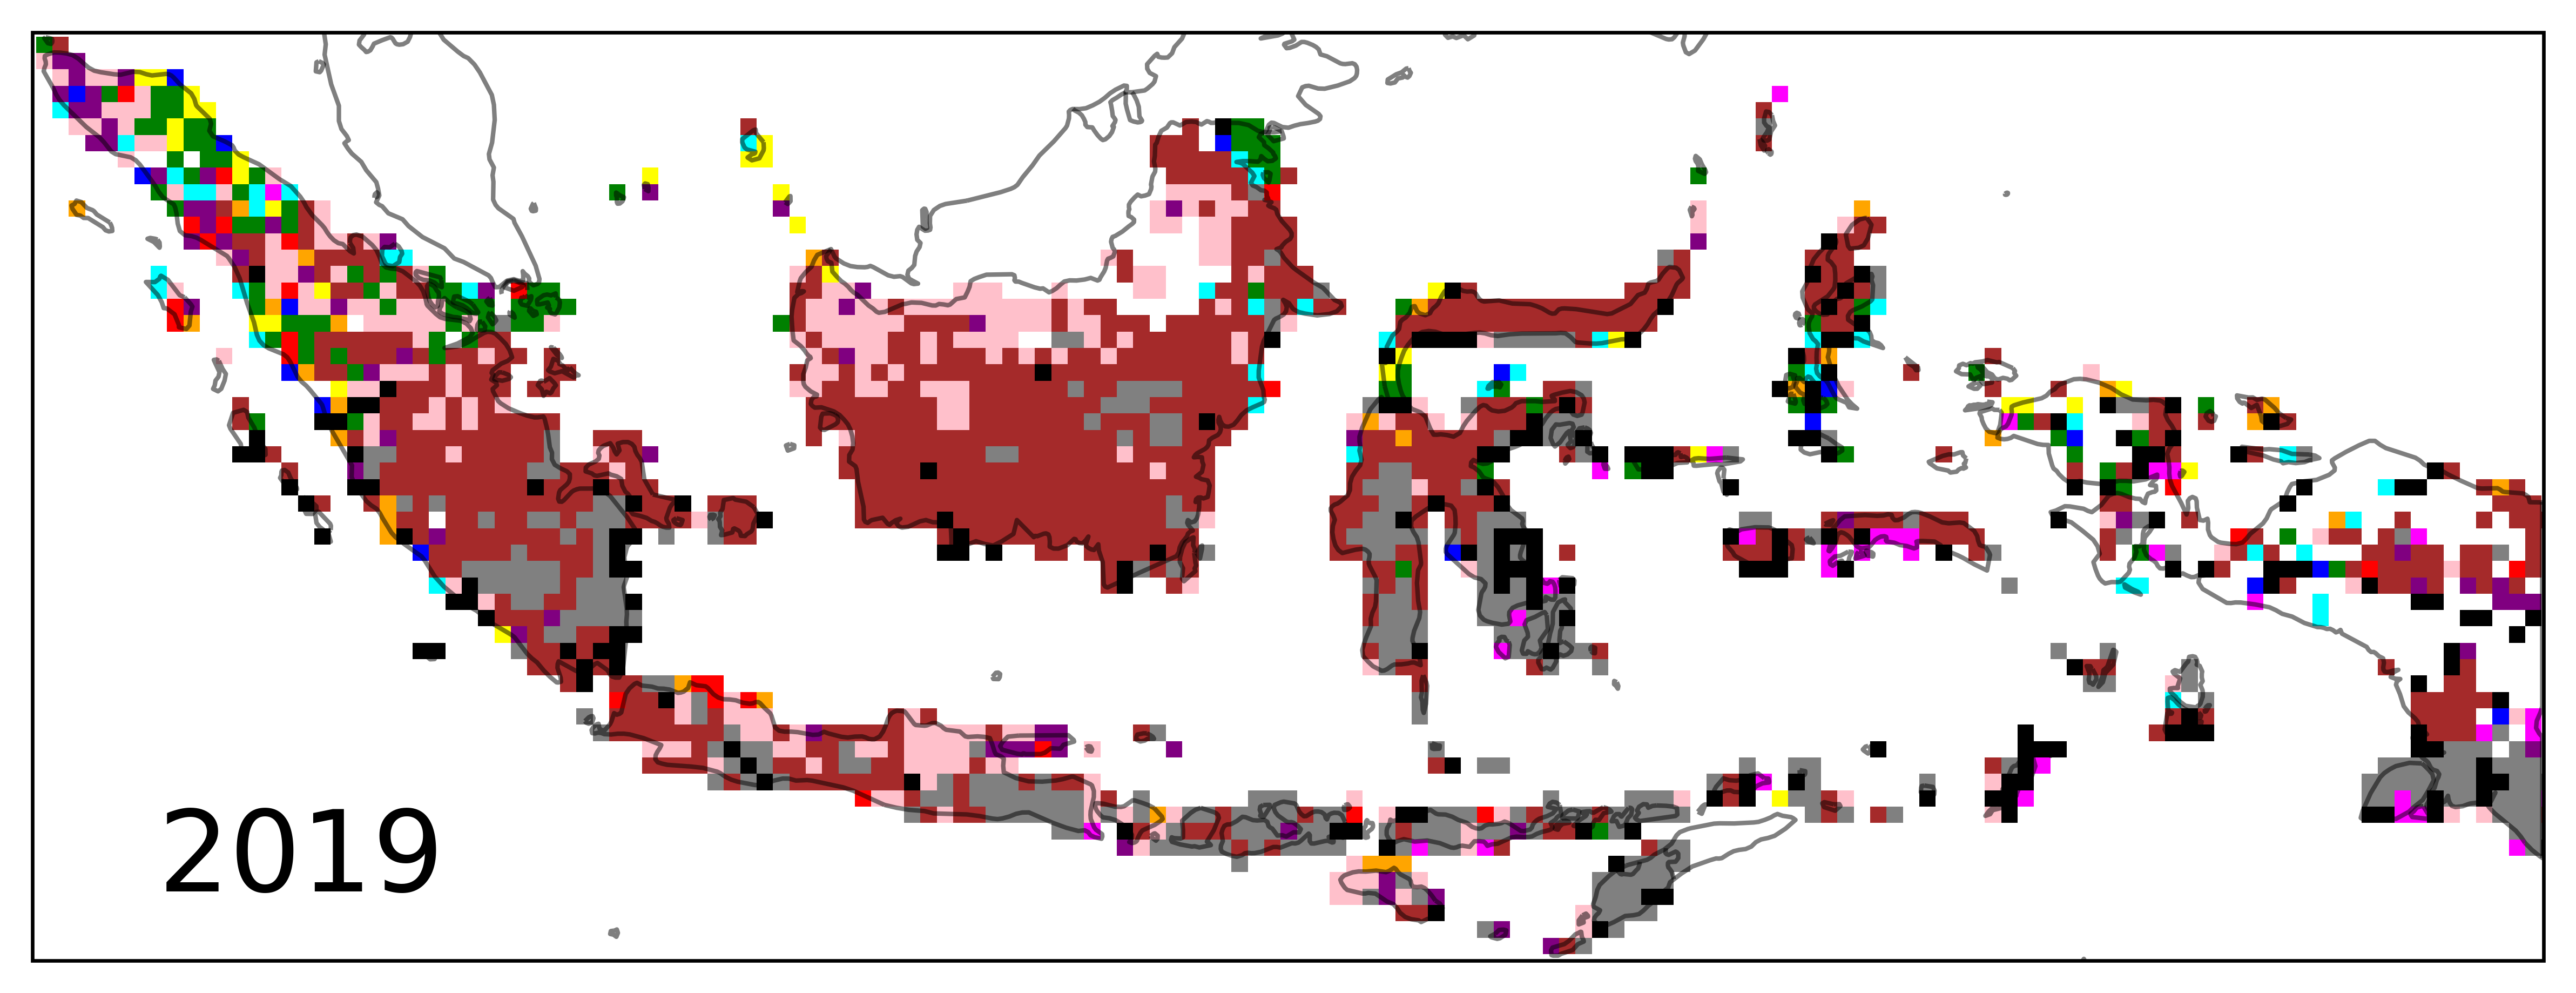

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap
import numpy as np
import cartopy.feature as cfeature
from shapely.geometry import Polygon
import geopandas as gpd

# 读取CSV文件
surveys_df_archive = pd.read_csv('fire_archive_SV-C2_437317.csv')
surveys_df_nrt = pd.read_csv('fire_nrt_SV-C2_437317.csv')

# 合并数据
surveys_df = pd.concat([surveys_df_archive, surveys_df_nrt], ignore_index=True)

# 筛选数据，只保留2012年的火灾数据
filtered_data = surveys_df[(surveys_df['acq_date'] >= '2019-01-01') &
                           (surveys_df['acq_date'] <= '2019-12-31')].copy()

# 将'acq_date'列转换为日期格式
filtered_data['acq_date'] = pd.to_datetime(filtered_data['acq_date'])

# 提取月份
filtered_data['month'] = filtered_data['acq_date'].dt.month

# 定义网格大小（单位：度）
grid_size = 0.3

# 创建经度和纬度的网格
lon_bins = np.arange(filtered_data['longitude'].min(), filtered_data['longitude'].max() + grid_size, grid_size)
lat_bins = np.arange(filtered_data['latitude'].min(), filtered_data['latitude'].max() + grid_size, grid_size)

# 将经纬度数据分配到网格中
filtered_data['lon_bin'] = np.digitize(filtered_data['longitude'], lon_bins) - 1
filtered_data['lat_bin'] = np.digitize(filtered_data['latitude'], lat_bins) - 1

# 统计每个网格中每个月的火灾数量
fire_counts = filtered_data.groupby(['lon_bin', 'lat_bin', 'month']).size().reset_index(name='count')

# 找出每个网格中火灾数量最多的月份
max_fire_months = fire_counts.loc[fire_counts.groupby(['lon_bin', 'lat_bin'])['count'].idxmax()]

# 为每个网格创建多边形并确定颜色
polygons = []
months = []
month_colors = {1: 'blue', 2: 'cyan', 3: 'green', 4: 'yellow', 5: 'orange', 6: 'red', 7: 'purple', 8: 'pink', 9: 'brown', 10: 'gray', 11: 'black', 12: 'magenta'}

for i in range(len(lon_bins) - 1):
    for j in range(len(lat_bins) - 1):
        lon_min, lon_max = lon_bins[i], lon_bins[i + 1]
        lat_min, lat_max = lat_bins[j], lat_bins[j + 1]
        polygons.append(Polygon([(lon_min, lat_min), (lon_max, lat_min), (lon_max, lat_max), (lon_min, lat_max)]))
        max_fire_month = max_fire_months[(max_fire_months['lon_bin'] == i) & (max_fire_months['lat_bin'] == j)]
        if not max_fire_month.empty:
            months.append(max_fire_month['month'].values[0])
        else:
            months.append(np.nan)  # 使用NaN标记没有火灾数据的网格

# 创建GeoDataFrame
grid_gdf = gpd.GeoDataFrame({'geometry': polygons, 'month': months})

# 创建图形和轴
fig = plt.figure(figsize=(10, 8), dpi=600)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 设置地图范围和添加地图特征
ax.set_extent([95, 141, -11, 6], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black', alpha=0.5)
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', alpha=0.5)

# 绘制网格，每个网格的颜色表示火灾数量最多的月份
cmap = ListedColormap([month_colors[m] for m in range(1, 13)])
grid_gdf.plot(column='month', cmap=cmap, linewidth=0, ax=ax, edgecolor='1', legend=False, missing_kwds={"color": "white"})

# 在子图左下角添加标题
ax.text(
    0.05,  # x 坐标（相对位置，0 为最左，1 为最右）
    0.05,  # y 坐标（相对位置，0 为最底，1 为最顶）
    f'2019',  # 文本内容
    transform=ax.transAxes,  # 坐标系统（相对坐标系统）
    fontsize= 25,  # 字体大小
    ha='left',  # 水平对齐方式
    va='bottom',  # 垂直对齐方式
    color='black',  # 文字颜色
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # 背景框样式
)

# 保存和显示图形
plt.savefig('F2-2019.png', dpi=600, bbox_inches='tight')
plt.show()


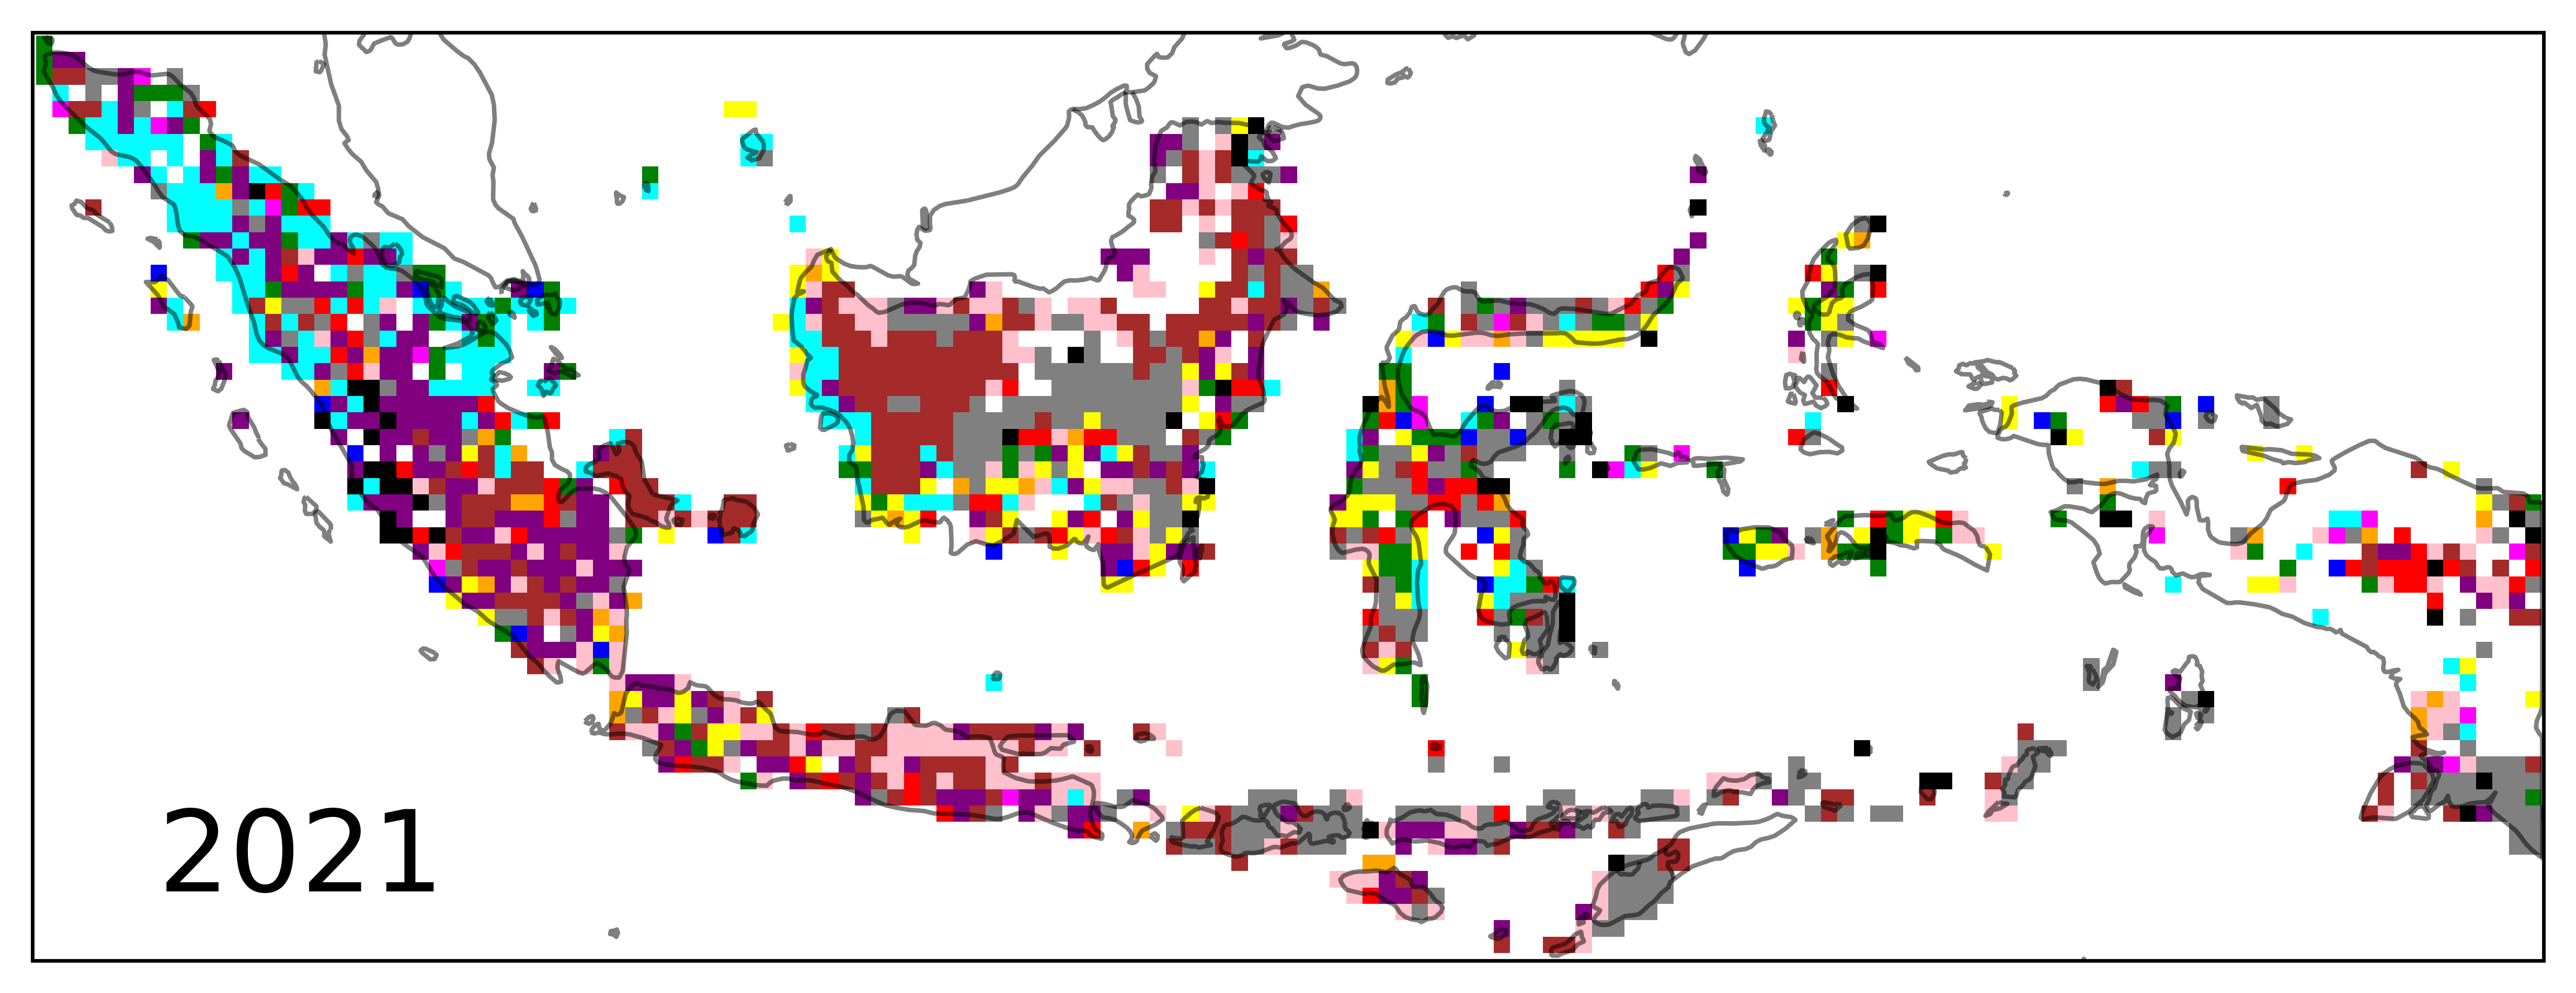

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap
import numpy as np
import cartopy.feature as cfeature
from shapely.geometry import Polygon
import geopandas as gpd

# 读取CSV文件
surveys_df_archive = pd.read_csv('fire_archive_SV-C2_437317.csv')
surveys_df_nrt = pd.read_csv('fire_nrt_SV-C2_437317.csv')

# 合并数据
surveys_df = pd.concat([surveys_df_archive, surveys_df_nrt], ignore_index=True)

# 筛选数据，只保留2012年的火灾数据
filtered_data = surveys_df[(surveys_df['acq_date'] >= '2021-01-01') &
                           (surveys_df['acq_date'] <= '2021-12-31')].copy()

# 将'acq_date'列转换为日期格式
filtered_data['acq_date'] = pd.to_datetime(filtered_data['acq_date'])

# 提取月份
filtered_data['month'] = filtered_data['acq_date'].dt.month

# 定义网格大小（单位：度）
grid_size = 0.3

# 创建经度和纬度的网格
lon_bins = np.arange(filtered_data['longitude'].min(), filtered_data['longitude'].max() + grid_size, grid_size)
lat_bins = np.arange(filtered_data['latitude'].min(), filtered_data['latitude'].max() + grid_size, grid_size)

# 将经纬度数据分配到网格中
filtered_data['lon_bin'] = np.digitize(filtered_data['longitude'], lon_bins) - 1
filtered_data['lat_bin'] = np.digitize(filtered_data['latitude'], lat_bins) - 1

# 统计每个网格中每个月的火灾数量
fire_counts = filtered_data.groupby(['lon_bin', 'lat_bin', 'month']).size().reset_index(name='count')

# 找出每个网格中火灾数量最多的月份
max_fire_months = fire_counts.loc[fire_counts.groupby(['lon_bin', 'lat_bin'])['count'].idxmax()]

# 为每个网格创建多边形并确定颜色
polygons = []
months = []
month_colors = {1: 'blue', 2: 'cyan', 3: 'green', 4: 'yellow', 5: 'orange', 6: 'red', 7: 'purple', 8: 'pink', 9: 'brown', 10: 'gray', 11: 'black', 12: 'magenta'}

for i in range(len(lon_bins) - 1):
    for j in range(len(lat_bins) - 1):
        lon_min, lon_max = lon_bins[i], lon_bins[i + 1]
        lat_min, lat_max = lat_bins[j], lat_bins[j + 1]
        polygons.append(Polygon([(lon_min, lat_min), (lon_max, lat_min), (lon_max, lat_max), (lon_min, lat_max)]))
        max_fire_month = max_fire_months[(max_fire_months['lon_bin'] == i) & (max_fire_months['lat_bin'] == j)]
        if not max_fire_month.empty:
            months.append(max_fire_month['month'].values[0])
        else:
            months.append(np.nan)  # 使用NaN标记没有火灾数据的网格

# 创建GeoDataFrame
grid_gdf = gpd.GeoDataFrame({'geometry': polygons, 'month': months})

# 创建图形和轴
fig = plt.figure(figsize=(10, 8), dpi=600)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 设置地图范围和添加地图特征
ax.set_extent([95, 141, -11, 6], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black', alpha=0.5)
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', alpha=0.5)

# 绘制网格，每个网格的颜色表示火灾数量最多的月份
cmap = ListedColormap([month_colors[m] for m in range(1, 13)])
grid_gdf.plot(column='month', cmap=cmap, linewidth=0, ax=ax, edgecolor='1', legend=False, missing_kwds={"color": "white"})

# 在子图左下角添加标题
ax.text(
    0.05,  # x 坐标（相对位置，0 为最左，1 为最右）
    0.05,  # y 坐标（相对位置，0 为最底，1 为最顶）
    f'2021',  # 文本内容
    transform=ax.transAxes,  # 坐标系统（相对坐标系统）
    fontsize= 25,  # 字体大小
    ha='left',  # 水平对齐方式
    va='bottom',  # 垂直对齐方式
    color='black',  # 文字颜色
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # 背景框样式
)

# 保存和显示图形
plt.savefig('F2-2021.png', dpi=600, bbox_inches='tight')
plt.show()


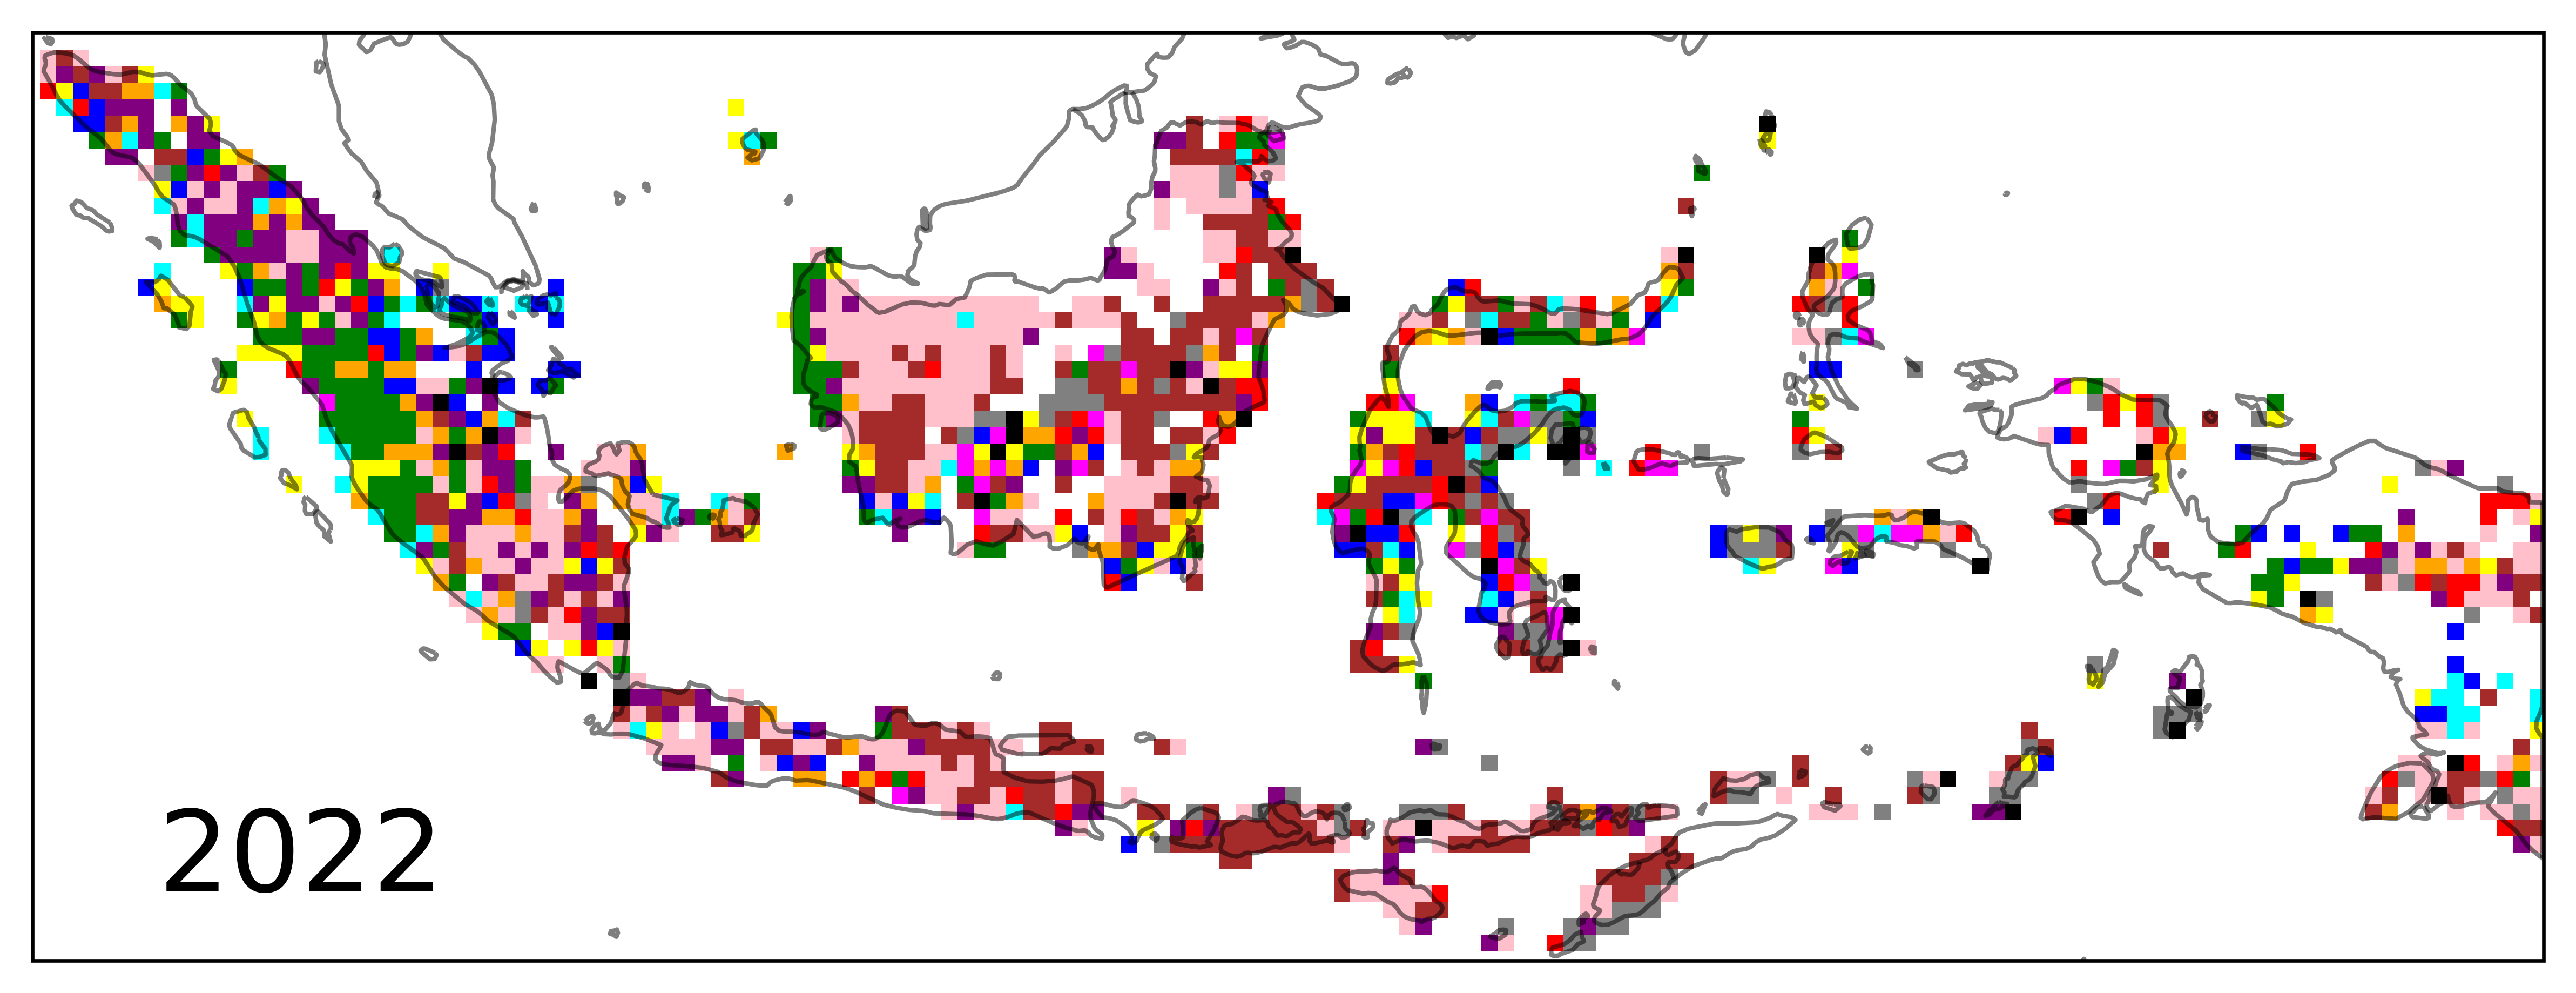

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap
import numpy as np
import cartopy.feature as cfeature
from shapely.geometry import Polygon
import geopandas as gpd

# 读取CSV文件
surveys_df_archive = pd.read_csv('fire_archive_SV-C2_437317.csv')
surveys_df_nrt = pd.read_csv('fire_nrt_SV-C2_437317.csv')

# 合并数据
surveys_df = pd.concat([surveys_df_archive, surveys_df_nrt], ignore_index=True)

# 筛选数据，只保留2012年的火灾数据
filtered_data = surveys_df[(surveys_df['acq_date'] >= '2022-01-01') &
                           (surveys_df['acq_date'] <= '2022-12-31')].copy()

# 将'acq_date'列转换为日期格式
filtered_data['acq_date'] = pd.to_datetime(filtered_data['acq_date'])

# 提取月份
filtered_data['month'] = filtered_data['acq_date'].dt.month

# 定义网格大小（单位：度）
grid_size = 0.3

# 创建经度和纬度的网格
lon_bins = np.arange(filtered_data['longitude'].min(), filtered_data['longitude'].max() + grid_size, grid_size)
lat_bins = np.arange(filtered_data['latitude'].min(), filtered_data['latitude'].max() + grid_size, grid_size)

# 将经纬度数据分配到网格中
filtered_data['lon_bin'] = np.digitize(filtered_data['longitude'], lon_bins) - 1
filtered_data['lat_bin'] = np.digitize(filtered_data['latitude'], lat_bins) - 1

# 统计每个网格中每个月的火灾数量
fire_counts = filtered_data.groupby(['lon_bin', 'lat_bin', 'month']).size().reset_index(name='count')

# 找出每个网格中火灾数量最多的月份
max_fire_months = fire_counts.loc[fire_counts.groupby(['lon_bin', 'lat_bin'])['count'].idxmax()]

# 为每个网格创建多边形并确定颜色
polygons = []
months = []
month_colors = {1: 'blue', 2: 'cyan', 3: 'green', 4: 'yellow', 5: 'orange', 6: 'red', 7: 'purple', 8: 'pink', 9: 'brown', 10: 'gray', 11: 'black', 12: 'magenta'}

for i in range(len(lon_bins) - 1):
    for j in range(len(lat_bins) - 1):
        lon_min, lon_max = lon_bins[i], lon_bins[i + 1]
        lat_min, lat_max = lat_bins[j], lat_bins[j + 1]
        polygons.append(Polygon([(lon_min, lat_min), (lon_max, lat_min), (lon_max, lat_max), (lon_min, lat_max)]))
        max_fire_month = max_fire_months[(max_fire_months['lon_bin'] == i) & (max_fire_months['lat_bin'] == j)]
        if not max_fire_month.empty:
            months.append(max_fire_month['month'].values[0])
        else:
            months.append(np.nan)  # 使用NaN标记没有火灾数据的网格

# 创建GeoDataFrame
grid_gdf = gpd.GeoDataFrame({'geometry': polygons, 'month': months})

# 创建图形和轴
fig = plt.figure(figsize=(10, 8), dpi=600)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 设置地图范围和添加地图特征
ax.set_extent([95, 141, -11, 6], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black', alpha=0.5)
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', alpha=0.5)

# 绘制网格，每个网格的颜色表示火灾数量最多的月份
cmap = ListedColormap([month_colors[m] for m in range(1, 13)])
grid_gdf.plot(column='month', cmap=cmap, linewidth=0, ax=ax, edgecolor='1', legend=False, missing_kwds={"color": "white"})

# 在子图左下角添加标题
ax.text(
    0.05,  # x 坐标（相对位置，0 为最左，1 为最右）
    0.05,  # y 坐标（相对位置，0 为最底，1 为最顶）
    f'2022',  # 文本内容
    transform=ax.transAxes,  # 坐标系统（相对坐标系统）
    fontsize= 25,  # 字体大小
    ha='left',  # 水平对齐方式
    va='bottom',  # 垂直对齐方式
    color='black',  # 文字颜色
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # 背景框样式
)

# 保存和显示图形
plt.savefig('F2-2022.png', dpi=600, bbox_inches='tight')
plt.show()


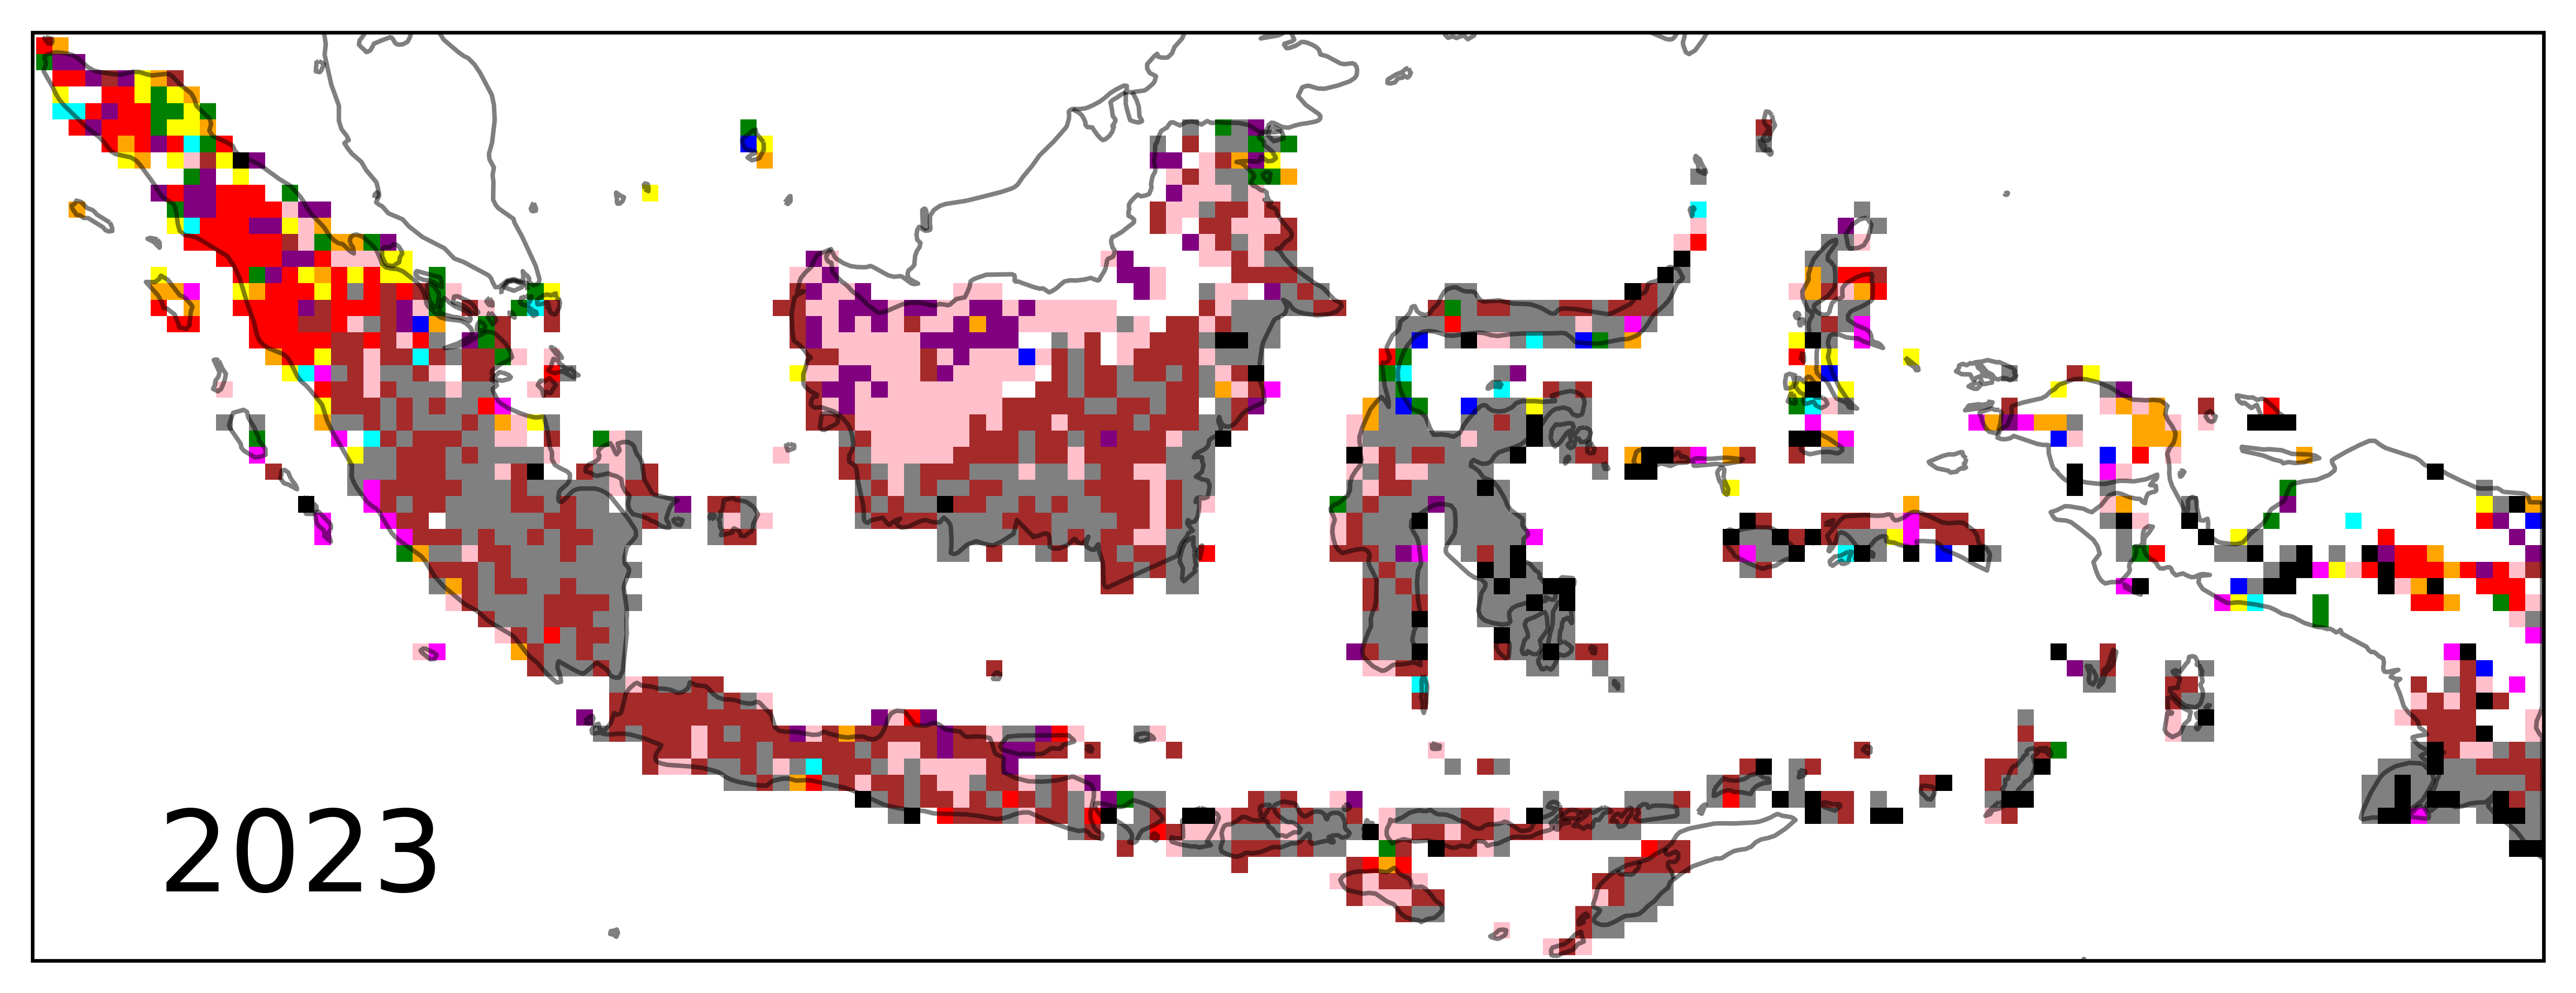

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap
import numpy as np
import cartopy.feature as cfeature
from shapely.geometry import Polygon
import geopandas as gpd

# 读取CSV文件
surveys_df_archive = pd.read_csv('fire_archive_SV-C2_437317.csv')
surveys_df_nrt = pd.read_csv('fire_nrt_SV-C2_437317.csv')

# 合并数据
surveys_df = pd.concat([surveys_df_archive, surveys_df_nrt], ignore_index=True)

# 筛选数据，只保留2012年的火灾数据
filtered_data = surveys_df[(surveys_df['acq_date'] >= '2023-01-01') &
                           (surveys_df['acq_date'] <= '2023-12-31')].copy()

# 将'acq_date'列转换为日期格式
filtered_data['acq_date'] = pd.to_datetime(filtered_data['acq_date'])

# 提取月份
filtered_data['month'] = filtered_data['acq_date'].dt.month

# 定义网格大小（单位：度）
grid_size = 0.3

# 创建经度和纬度的网格
lon_bins = np.arange(filtered_data['longitude'].min(), filtered_data['longitude'].max() + grid_size, grid_size)
lat_bins = np.arange(filtered_data['latitude'].min(), filtered_data['latitude'].max() + grid_size, grid_size)

# 将经纬度数据分配到网格中
filtered_data['lon_bin'] = np.digitize(filtered_data['longitude'], lon_bins) - 1
filtered_data['lat_bin'] = np.digitize(filtered_data['latitude'], lat_bins) - 1

# 统计每个网格中每个月的火灾数量
fire_counts = filtered_data.groupby(['lon_bin', 'lat_bin', 'month']).size().reset_index(name='count')

# 找出每个网格中火灾数量最多的月份
max_fire_months = fire_counts.loc[fire_counts.groupby(['lon_bin', 'lat_bin'])['count'].idxmax()]

# 为每个网格创建多边形并确定颜色
polygons = []
months = []
month_colors = {1: 'blue', 2: 'cyan', 3: 'green', 4: 'yellow', 5: 'orange', 6: 'red', 7: 'purple', 8: 'pink', 9: 'brown', 10: 'gray', 11: 'black', 12: 'magenta'}

for i in range(len(lon_bins) - 1):
    for j in range(len(lat_bins) - 1):
        lon_min, lon_max = lon_bins[i], lon_bins[i + 1]
        lat_min, lat_max = lat_bins[j], lat_bins[j + 1]
        polygons.append(Polygon([(lon_min, lat_min), (lon_max, lat_min), (lon_max, lat_max), (lon_min, lat_max)]))
        max_fire_month = max_fire_months[(max_fire_months['lon_bin'] == i) & (max_fire_months['lat_bin'] == j)]
        if not max_fire_month.empty:
            months.append(max_fire_month['month'].values[0])
        else:
            months.append(np.nan)  # 使用NaN标记没有火灾数据的网格

# 创建GeoDataFrame
grid_gdf = gpd.GeoDataFrame({'geometry': polygons, 'month': months})

# 创建图形和轴
fig = plt.figure(figsize=(10, 8), dpi=600)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 设置地图范围和添加地图特征
ax.set_extent([95, 141, -11, 6], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black', alpha=0.5)
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', alpha=0.5)

# 绘制网格，每个网格的颜色表示火灾数量最多的月份
cmap = ListedColormap([month_colors[m] for m in range(1, 13)])
grid_gdf.plot(column='month', cmap=cmap, linewidth=0, ax=ax, edgecolor='1', legend=False, missing_kwds={"color": "white"})

# 在子图左下角添加标题
ax.text(
    0.05,  # x 坐标（相对位置，0 为最左，1 为最右）
    0.05,  # y 坐标（相对位置，0 为最底，1 为最顶）
    f'2023',  # 文本内容
    transform=ax.transAxes,  # 坐标系统（相对坐标系统）
    fontsize= 25,  # 字体大小
    ha='left',  # 水平对齐方式
    va='bottom',  # 垂直对齐方式
    color='black',  # 文字颜色
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # 背景框样式
)

# 保存和显示图形
plt.savefig('F2-2023.png', dpi=600, bbox_inches='tight')
plt.show()


/tmp/ipykernel_505164/2845081079.py:12: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  surveys_df_archive = pd.read_csv('2.csv')


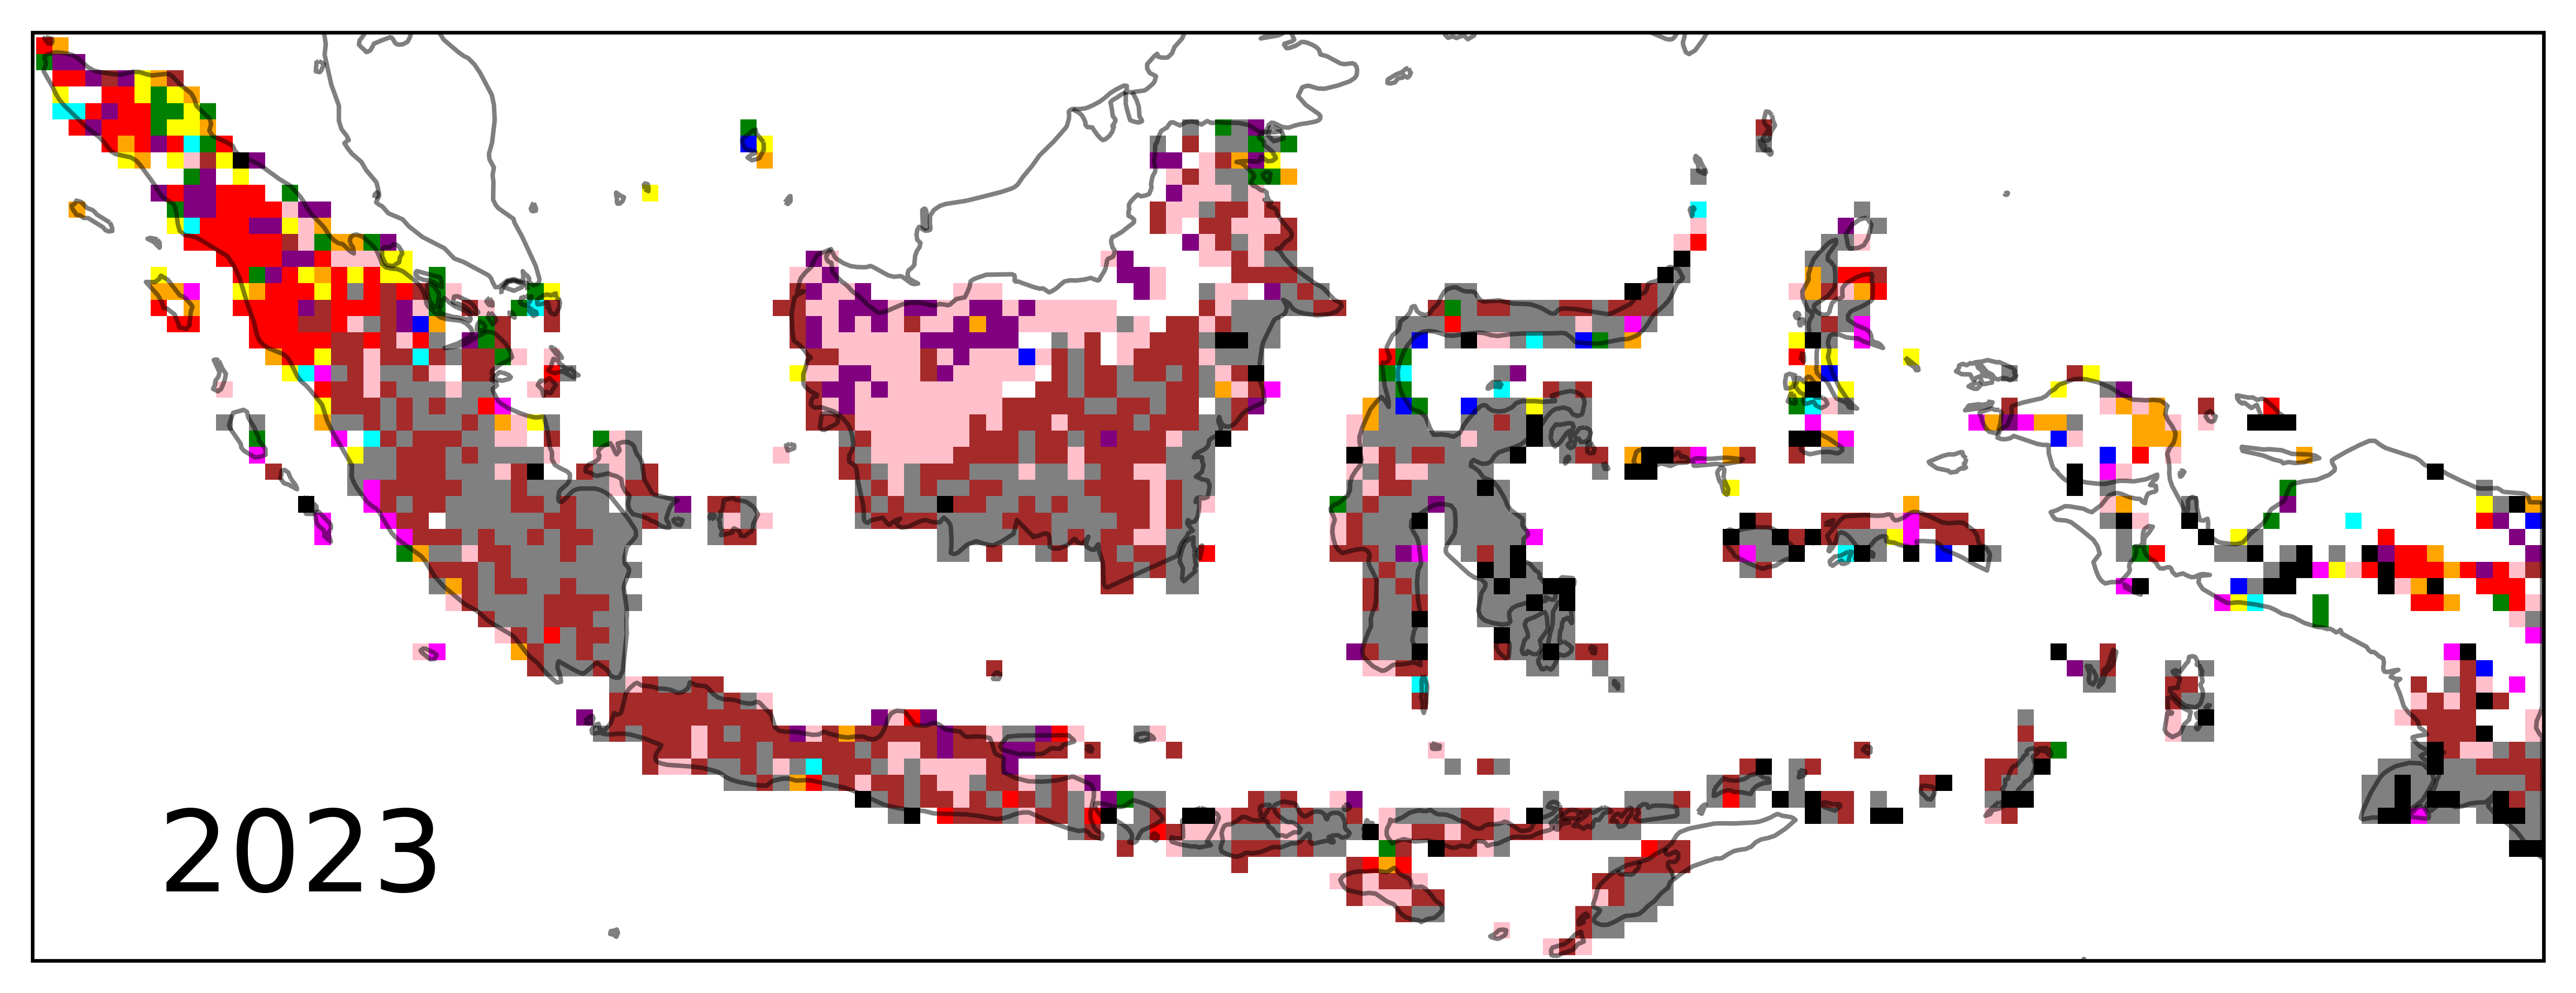

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap
import numpy as np
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from shapely.geometry import Polygon
import geopandas as gpd

# 读取csv文件
surveys_df_archive = pd.read_csv('2.csv')

# 筛选数据，只保留2023年的火灾数据
filtered_data = surveys_df_archive[(surveys_df_archive['acq_date'] >= '2023-01-01') &
                                   (surveys_df_archive['acq_date'] <= '2023-12-31')].copy()

# 将'acq_date'列转换为日期格式
filtered_data['acq_date'] = pd.to_datetime(filtered_data['acq_date'])

# 提取月份
filtered_data['month'] = filtered_data['acq_date'].dt.month

# 定义网格大小（单位：度）
grid_size = 0.3

# 创建经度和纬度的网格
lon_bins = np.arange(filtered_data['longitude'].min(), filtered_data['longitude'].max() + grid_size, grid_size)
lat_bins = np.arange(filtered_data['latitude'].min(), filtered_data['latitude'].max() + grid_size, grid_size)

# 将经纬度数据分配到网格中
filtered_data['lon_bin'] = np.digitize(filtered_data['longitude'], lon_bins) - 1
filtered_data['lat_bin'] = np.digitize(filtered_data['latitude'], lat_bins) - 1

# 统计每个网格中每个月的火灾数量
fire_counts = filtered_data.groupby(['lon_bin', 'lat_bin', 'month']).size().reset_index(name='count')

# 找出每个网格中火灾数量最多的月份
max_fire_months = fire_counts.loc[fire_counts.groupby(['lon_bin', 'lat_bin'])['count'].idxmax()]

# 为每个网格创建多边形并确定颜色
polygons = []
months = []
month_colors = {1: 'blue', 2: 'cyan', 3: 'green', 4: 'yellow', 5: 'orange', 6: 'red', 7: 'purple', 8: 'pink', 9: 'brown', 10: 'gray', 11: 'black', 12: 'magenta'}

for i in range(len(lon_bins) - 1):
    for j in range(len(lat_bins) - 1):
        lon_min, lon_max = lon_bins[i], lon_bins[i + 1]
        lat_min, lat_max = lat_bins[j], lat_bins[j + 1]
        polygons.append(Polygon([(lon_min, lat_min), (lon_max, lat_min), (lon_max, lat_max), (lon_min, lat_max)]))
        max_fire_month = max_fire_months[(max_fire_months['lon_bin'] == i) & (max_fire_months['lat_bin'] == j)]
        if not max_fire_month.empty:
            months.append(max_fire_month['month'].values[0])
        else:
            months.append(np.nan)  # 使用NaN标记没有火灾数据的网格

# 创建GeoDataFrame
grid_gdf = gpd.GeoDataFrame({'geometry': polygons, 'month': months})

# 创建图形和轴
fig = plt.figure(figsize=(10, 8), dpi=600)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 设置地图范围和添加地图特征
ax.set_extent([95, 141, -11, 6], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black', alpha=0.5)
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', alpha=0.5)



# 绘制网格，每个网格的颜色表示火灾数量最多的月份
cmap = ListedColormap([month_colors[m] for m in range(1, 13)])
grid_gdf.plot(column='month', cmap=cmap, linewidth=0, ax=ax, edgecolor='1', legend=False, missing_kwds={"color": "white"})
# 在子图左下角添加标题
ax.text(
    0.05,  # x 坐标（相对位置，0 为最左，1 为最右）
    0.05,  # y 坐标（相对位置，0 为最底，1 为最顶）
    f'2023',  # 文本内容
    transform=ax.transAxes,  # 坐标系统（相对坐标系统）
    fontsize= 25,  # 字体大小
    ha='left',  # 水平对齐方式
    va='bottom',  # 垂直对齐方式
    color='black',  # 文字颜色
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')  # 背景框样式
)
# 设置标题并显示图形
#plt.title('Fire Sensitivity by Month (2023)')
plt.savefig('F2-2023.png',dpi=600, bbox_inches='tight')
plt.show()